In [30]:
#Parameterized Quantum Circuits

In [5]:
from qiskit.circuit import QuantumCircuit, Parameter

theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.rz(theta, 0)
qc.crz(theta, 0, 1)
qc.draw()

┌───────┐         
q_0: ┤ Rz(θ) ├────■────
     └───────┘┌───┴───┐
q_1: ─────────┤ Rz(θ) ├
              └───────┘

In [3]:
from qiskit.circuit import ParameterVector

theta_list = ParameterVector('θ', length=2)

qc = QuantumCircuit(2)
qc.rz(theta_list[0], 0)
qc.crz(theta_list[1], 0, 1)
qc.draw()

┌──────────┐            
q_0: ┤ Rz(θ[0]) ├─────■──────
     └──────────┘┌────┴─────┐
q_1: ────────────┤ Rz(θ[1]) ├
                 └──────────┘

In [14]:

# First, we need to define the circuits:
theta_param = Parameter('θ')
phi_param = Parameter('Φ')

# Circuit A
qc_A = QuantumCircuit(1)
qc_A.h(0)
qc_A.rz(theta_param, 0)
qc_A.draw()

┌───┐┌───────┐
q: ┤ H ├┤ Rz(θ) ├
   └───┘└───────┘

In [15]:
# Circuit B
qc_B = QuantumCircuit(1)
qc_B.h(0)
qc_B.rz(theta_param, 0)
qc_B.rx(phi_param, 0)
qc_B.draw()

┌───┐┌───────┐┌───────┐
q: ┤ H ├┤ Rz(θ) ├┤ Rx(Φ) ├
   └───┘└───────┘└───────┘

Left to Right: Circuit_A Circuit_B


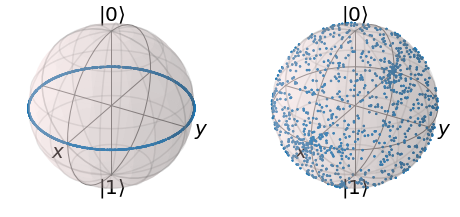

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Next we uniformly sample the parameter space for the two parameters theta and phi
np.random.seed(0)
num_param = 1000
theta = [2*np.pi*np.random.uniform() for i in range(num_param)]
phi = [2*np.pi*np.random.uniform() for i in range(num_param)]

# Then we take the parameter value lists, build the state vectors corresponding
# to each circuit, and plot them on the Bloch sphere:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]

# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(num_param):    
    state_1=Statevector.from_instruction(qc_A.bind_parameters({theta_param:theta[i]}))
    state_2=Statevector.from_instruction(qc_B.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))
print("Left to Right: Circuit_A Circuit_B")
b1.show()
b2.show()

In [19]:
# Circuit A
theta = Parameter('θ')

qc_A = QuantumCircuit(4)
qc_A.rz(theta,0)
qc_A.rx(theta,0)
qc_A.rz(theta,1).rx(theta,1)
qc_A.rz(theta,2).rx(theta,2)
qc_A.rz(theta,3).rx(theta,3)
qc_A.draw()

AttributeError: 'InstructionSet' object has no attribute 'rx'

This is the time it takes for a quantum system to stop being 'coherent' with itself, meaning we can't interfere it with itself any more.

In [21]:
from qiskit.circuit.library import ZZFeatureMap

qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)

qc_zz.decompose().draw()

┌───┐ ░ ┌─────────────┐                                               »
q_0: ┤ H ├─░─┤ P(2.0*x[0]) ├──■────────────────────────────────────■────■──»
     ├───┤ ░ ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├─░─┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤ ░ ├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├─░─┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     └───┘ ░ └─────────────┘                                          └───┘»
«                                               »
«q_0: ──────────────────────────────────■───────»
«                                       │       »
«q_1: ──────────────────────────────────┼────■──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐»
«q_2: ┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├»
«     └──────────────────────────────┘└───┘└───┘»
«                                          
«q_0: ─────────────────────────────────────
«                                          
«q_1: ──────────────────────────────────■──
«     ┌──────────────────────────────┐┌─┴─┐
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├
«     └──────────────────────────────┘└───┘

In [22]:
from qiskit.circuit.library import TwoLocal

qc_twolocal = TwoLocal(num_qubits=3, reps=2, rotation_blocks=['ry','rz'],
                entanglement_blocks='cz', skip_final_rotation_layer=True,
                insert_barriers=True)

qc_twolocal.decompose().draw()

┌──────────┐┌──────────┐ ░           ░ ┌──────────┐ ┌──────────┐ ░       »
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[3]) ├─░──■──■─────░─┤ Ry(θ[6]) ├─┤ Rz(θ[9]) ├─░──■──■─»
     ├──────────┤├──────────┤ ░  │  │     ░ ├──────────┤┌┴──────────┤ ░  │  │ »
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[4]) ├─░──■──┼──■──░─┤ Ry(θ[7]) ├┤ Rz(θ[10]) ├─░──■──┼─»
     ├──────────┤├──────────┤ ░     │  │  ░ ├──────────┤├───────────┤ ░     │ »
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[5]) ├─░─────■──■──░─┤ Ry(θ[8]) ├┤ Rz(θ[11]) ├─░─────■─»
     └──────────┘└──────────┘ ░           ░ └──────────┘└───────────┘ ░       »
«        
«q_0: ───
«        
«q_1: ─■─
«      │ 
«q_2: ─■─
«

In [23]:
qc_13 = TwoLocal(3, rotation_blocks='ry',
                 entanglement_blocks='crz', entanglement='sca',
                 reps=3, skip_final_rotation_layer=True,
                 insert_barriers=True)

qc_13.decompose().draw()

┌──────────┐ ░ ┌──────────┐                         ░ ┌──────────┐ ░ »
q_0: ┤ Ry(θ[0]) ├─░─┤ Rz(θ[3]) ├─────■───────────────────░─┤ Ry(θ[6]) ├─░─»
     ├──────────┤ ░ └────┬─────┘┌────┴─────┐             ░ ├──────────┤ ░ »
q_1: ┤ Ry(θ[1]) ├─░──────┼──────┤ Rz(θ[4]) ├─────■───────░─┤ Ry(θ[7]) ├─░─»
     ├──────────┤ ░      │      └──────────┘┌────┴─────┐ ░ ├──────────┤ ░ »
q_2: ┤ Ry(θ[2]) ├─░──────■──────────────────┤ Rz(θ[5]) ├─░─┤ Ry(θ[8]) ├─░─»
     └──────────┘ ░                         └──────────┘ ░ └──────────┘ ░ »
«                              ┌───────────┐ ░ ┌───────────┐ ░              »
«q_0: ──────────────────■──────┤ Rz(θ[11]) ├─░─┤ Ry(θ[12]) ├─░───────■──────»
«     ┌──────────┐      │      └─────┬─────┘ ░ ├───────────┤ ░ ┌─────┴─────┐»
«q_1: ┤ Rz(θ[9]) ├──────┼────────────■───────░─┤ Ry(θ[13]) ├─░─┤ Rz(θ[15]) ├»
«     └────┬─────┘┌─────┴─────┐              ░ ├───────────┤ ░ └───────────┘»
«q_2: ─────■──────┤ Rz(θ[10]) ├──────────────░─┤ Ry(θ[14]) ├─░──────────────»
«                 └───────────┘              ░ └───────────┘ ░              »
«                  ┌───────────┐
«q_0: ─────────────┤ Rz(θ[17]) ├
«                  └─────┬─────┘
«q_1: ──────■────────────┼──────
«     ┌─────┴─────┐      │      
«q_2: ┤ Rz(θ[16]) ├──────■──────
«     └───────────┘

In [24]:
from qiskit.circuit.library import NLocal

# rotation block:
rot = QuantumCircuit(2)
params = ParameterVector('r', 2)
rot.ry(params[0], 0)
rot.rz(params[1], 1)

# entanglement block:
ent = QuantumCircuit(4)
params = ParameterVector('e', 3)
ent.crx(params[0], 0, 1)
ent.crx(params[1], 1, 2)
ent.crx(params[2], 2, 3)

qc_nlocal = NLocal(num_qubits=6, rotation_blocks=rot,
                   entanglement_blocks=ent, entanglement='linear',
                   skip_final_rotation_layer=True, insert_barriers=True)

qc_nlocal.decompose().draw()

┌──────────┐ ░                                                 »
q_0: ┤ Ry(θ[0]) ├─░──────■──────────────────────────────────────────»
     ├──────────┤ ░ ┌────┴─────┐                                    »
q_1: ┤ Rz(θ[1]) ├─░─┤ Rx(θ[6]) ├─────■───────────────────────■──────»
     ├──────────┤ ░ └──────────┘┌────┴─────┐            ┌────┴─────┐»
q_2: ┤ Ry(θ[2]) ├─░─────────────┤ Rx(θ[7]) ├─────■──────┤ Rx(θ[9]) ├»
     ├──────────┤ ░             └──────────┘┌────┴─────┐└──────────┘»
q_3: ┤ Rz(θ[3]) ├─░─────────────────────────┤ Rx(θ[8]) ├────────────»
     ├──────────┤ ░                         └──────────┘            »
q_4: ┤ Ry(θ[4]) ├─░─────────────────────────────────────────────────»
     ├──────────┤ ░                                                 »
q_5: ┤ Rz(θ[5]) ├─░─────────────────────────────────────────────────»
     └──────────┘ ░                                                 »
«                                                                      
«q_0: ─────────────────────────────────────────────────────────────────
«                                                                      
«q_1: ─────────────────────────────────────────────────────────────────
«                                                                      
«q_2: ──────■─────────────────────────■────────────────────────────────
«     ┌─────┴─────┐             ┌─────┴─────┐                          
«q_3: ┤ Rx(θ[10]) ├──────■──────┤ Rx(θ[12]) ├──────■───────────────────
«     └───────────┘┌─────┴─────┐└───────────┘┌─────┴─────┐             
«q_4: ─────────────┤ Rx(θ[11]) ├─────────────┤ Rx(θ[13]) ├──────■──────
«                  └───────────┘             └───────────┘┌─────┴─────┐
«q_5: ────────────────────────────────────────────────────┤ Rx(θ[14]) ├
«                                                         └───────────┘

In [25]:
import qiskit.tools.jupyter
%qiskit_version_table

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [29]:
#Data Encoding

In [26]:
import math
from qiskit import QuantumCircuit

desired_state = [
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(2),
    0,
    1 / math.sqrt(2)]

qc = QuantumCircuit(3)
qc.initialize(desired_state, [0,1,2])

qc.decompose().decompose().decompose().decompose().decompose().draw()

┌─────────┐                           ┌───┐┌───────┐┌───┐┌───────┐»
q_0: ─|0>──┤ Ry(π/2) ├───────────────────────────┤ X ├┤ Ry(0) ├┤ X ├┤ Ry(0) ├»
          ┌┴─────────┴─┐┌───┐┌─────────────┐┌───┐└─┬─┘└───────┘└─┬─┘└───────┘»
q_1: ─|0>─┤ R(π/4,π/2) ├┤ X ├┤ R(-π/4,π/2) ├┤ X ├──■─────────────┼───────────»
          ├───────────┬┘└─┬─┘└─────────────┘└─┬─┘                │           »
q_2: ─|0>─┤ U3(π,0,0) ├───■───────────────────■──────────────────■───────────»
          └───────────┘                                                      »
«     ┌───┐┌──────────┐┌───┐
«q_0: ┤ X ├┤ Ry(-π/2) ├┤ X ├
«     └─┬─┘└──────────┘└─┬─┘
«q_1: ──■────────────────┼──
«                        │  
«q_2: ───────────────────■──
«

In [27]:
desired_state = [
    1 / math.sqrt(15.25) * 1.5,
    0,
    1 / math.sqrt(15.25) * -2,
    1 / math.sqrt(15.25) * 3]

qc = QuantumCircuit(2)
qc.initialize(desired_state, [0,1])

qc.decompose().decompose().decompose().decompose().decompose().draw()

┌────────────────┐               ┌───┐┌─────────────────┐┌─────────┐»
q_0: ─|0>─┤ R(0.98279,π/2) ├───────────────┤ X ├┤ R(-0.98279,π/2) ├┤ U1(π/2) ├»
          ├────────────────┤┌─────────────┐└─┬─┘└─────────────────┘└─────────┘»
q_1: ─|0>─┤ U3(2.3531,0,0) ├┤ U3(0,0,π/2) ├──■────────────────────────────────»
          └────────────────┘└─────────────┘                                   »
«     ┌───┐┌──────────┐
«q_0: ┤ X ├┤ U1(-π/2) ├
«     └─┬─┘└──────────┘
«q_1: ──■──────────────
«

In [34]:
qc = QuantumCircuit(3)

qc.ry(0, 0)
qc.ry(math.pi/4, 1)
qc.ry(math.pi/2, 2)
qc.draw()

┌───────┐ 
q_0: ─┤ Ry(0) ├─
     ┌┴───────┴┐
q_1: ┤ Ry(π/4) ├
     ├─────────┤
q_2: ┤ Ry(π/2) ├
     └─────────┘

In [35]:
from qiskit.circuit.library import EfficientSU2

circuit = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)
circuit.decompose().draw()

┌──────────┐┌──────────┐ ░                 ░ ┌──────────┐ ┌──────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[3]) ├─░───■────■────────░─┤ Ry(θ[6]) ├─┤ Rz(θ[9]) ├
     ├──────────┤├──────────┤ ░ ┌─┴─┐  │        ░ ├──────────┤┌┴──────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[4]) ├─░─┤ X ├──┼────■───░─┤ Ry(θ[7]) ├┤ Rz(θ[10]) ├
     ├──────────┤├──────────┤ ░ └───┘┌─┴─┐┌─┴─┐ ░ ├──────────┤├───────────┤
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[5]) ├─░──────┤ X ├┤ X ├─░─┤ Ry(θ[8]) ├┤ Rz(θ[11]) ├
     └──────────┘└──────────┘ ░      └───┘└───┘ ░ └──────────┘└───────────┘

In [36]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]

encode = circuit.bind_parameters(x)
encode.decompose().draw()

┌─────────┐┌─────────┐ ░                 ░ ┌─────────┐┌─────────┐
q_0: ┤ Ry(0.1) ├┤ Rz(0.4) ├─░───■────■────────░─┤ Ry(0.7) ├┤ Rz(1.0) ├
     ├─────────┤├─────────┤ ░ ┌─┴─┐  │        ░ ├─────────┤├─────────┤
q_1: ┤ Ry(0.2) ├┤ Rz(0.5) ├─░─┤ X ├──┼────■───░─┤ Ry(0.8) ├┤ Rz(1.1) ├
     ├─────────┤├─────────┤ ░ └───┘┌─┴─┐┌─┴─┐ ░ ├─────────┤├─────────┤
q_2: ┤ Ry(0.3) ├┤ Rz(0.6) ├─░──────┤ X ├┤ X ├─░─┤ Ry(0.9) ├┤ Rz(1.2) ├
     └─────────┘└─────────┘ ░      └───┘└───┘ ░ └─────────┘└─────────┘

In [37]:
from qiskit.circuit.library import ZZFeatureMap

circuit = ZZFeatureMap(3, reps=1, insert_barriers=True)
circuit.decompose().draw()

┌───┐ ░ ┌─────────────┐                                               »
q_0: ┤ H ├─░─┤ P(2.0*x[0]) ├──■────────────────────────────────────■────■──»
     ├───┤ ░ ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├─░─┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤ ░ ├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├─░─┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     └───┘ ░ └─────────────┘                                          └───┘»
«                                               »
«q_0: ──────────────────────────────────■───────»
«                                       │       »
«q_1: ──────────────────────────────────┼────■──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐»
«q_2: ┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├»
«     └──────────────────────────────┘└───┘└───┘»
«                                          
«q_0: ─────────────────────────────────────
«                                          
«q_1: ──────────────────────────────────■──
«     ┌──────────────────────────────┐┌─┴─┐
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├
«     └──────────────────────────────┘└───┘

In [38]:
x = [0.1, 0.2, 0.3]

encode = circuit.bind_parameters(x)
encode.decompose().draw()

┌───┐ ░ ┌────────┐                                      »
q_0: ┤ H ├─░─┤ P(0.2) ├──■───────────────────────────■────■──»
     ├───┤ ░ ├────────┤┌─┴─┐┌─────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├─░─┤ P(0.4) ├┤ X ├┤ P(17.8942532100248) ├┤ X ├──┼──»
     ├───┤ ░ ├────────┤└───┘└─────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├─░─┤ P(0.6) ├─────────────────────────────────┤ X ├»
     └───┘ ░ └────────┘                                 └───┘»
«                                                                  
«q_0: ─────────────────────────■───────────────────────────────────
«                              │                                   
«q_1: ─────────────────────────┼────■───────────────────────────■──
«     ┌─────────────────────┐┌─┴─┐┌─┴─┐┌─────────────────────┐┌─┴─┐
«q_2: ┤ P(17.2859346793068) ├┤ X ├┤ X ├┤ P(16.7176161485889) ├┤ X ├
«     └─────────────────────┘└───┘└───┘└─────────────────────┘└───┘

In [28]:
#Traininng Parameterized quantum circuits

In [31]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=2, reps=1,
                        entanglement='linear').decompose()
ansatz.draw()

┌──────────┐     ┌──────────┐
q_0: ┤ Ry(θ[0]) ├──■──┤ Ry(θ[2]) ├
     ├──────────┤┌─┴─┐├──────────┤
q_1: ┤ Ry(θ[1]) ├┤ X ├┤ Ry(θ[3]) ├
     └──────────┘└───┘└──────────┘

In [32]:
from qiskit.opflow import Z, I

hamiltonian = Z ^ Z

In [33]:
from qiskit.opflow import StateFn, PauliExpectation

expectation = StateFn(hamiltonian, is_measurement=True) @ StateFn(ansatz)
pauli_basis = PauliExpectation().convert(expectation)

In [39]:
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.opflow import PauliExpectation, CircuitSampler

quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'),
                                   # we'll set a seed for reproducibility
                                   shots = 8192, seed_simulator = 2718,
                                   seed_transpiler = 2718)
sampler = CircuitSampler(quantum_instance)

def evaluate_expectation(x):
    value_dict = dict(zip(ansatz.parameters, x))
    result = sampler.convert(pauli_basis, params=value_dict).eval()  
    return np.real(result)

In [40]:
import numpy as np

point = np.random.random(ansatz.num_parameters)
index = 2

In [41]:
eps = 0.2
# make identity vector with a 1 at index ``index``, otherwise 0
e_i = np.identity(point.size)[:, index]

plus = point + eps * e_i
minus = point - eps * e_i

finite_difference = (
    evaluate_expectation(plus) - evaluate_expectation(minus)) / (2 * eps)
print(finite_difference)

-0.22583007812500028


In [42]:
from qiskit.opflow import Gradient

shifter = Gradient('fin_diff', analytic=False, epsilon=eps)
grad = shifter.convert(expectation, params=ansatz.parameters[index])
print(grad)

value_dict = dict(zip(ansatz.parameters, point))
sampler.convert(grad, value_dict).eval().real

SummedOp([
  2.5 * ComposedOp([
    OperatorMeasurement(ZZ),
    CircuitStateFn(
         ┌──────────┐     ┌────────────────┐
    q_0: ┤ Ry(θ[0]) ├──■──┤ Ry(θ[2] + 0.2) ├
         ├──────────┤┌─┴─┐└──┬──────────┬──┘
    q_1: ┤ Ry(θ[1]) ├┤ X ├───┤ Ry(θ[3]) ├───
         └──────────┘└───┘   └──────────┘   
    )
  ]),
  -2.5 * ComposedOp([
    OperatorMeasurement(ZZ),
    CircuitStateFn(
         ┌──────────┐     ┌────────────────┐
    q_0: ┤ Ry(θ[0]) ├──■──┤ Ry(θ[2] - 0.2) ├
         ├──────────┤┌─┴─┐└──┬──────────┬──┘
    q_1: ┤ Ry(θ[1]) ├┤ X ├───┤ Ry(θ[3]) ├───
         └──────────┘└───┘   └──────────┘   
    )
  ])
])


-0.23071289062500044

In [43]:
eps = np.pi / 2
e_i = np.identity(point.size)[:, index]

plus = point + eps * e_i
minus = point - eps * e_i

finite_difference = (
    evaluate_expectation(plus) - evaluate_expectation(minus)) / 2

print(finite_difference)

-0.22167968750000006


In [44]:
shifter = Gradient()  # parameter-shift rule is the default
grad = shifter.convert(expectation, params=ansatz.parameters[index])
sampler.convert(grad, value_dict).eval().real

-0.22998046875000006

In [45]:
# initial_point = np.random.random(ansatz.num_parameters)
initial_point = np.array([0.43253681, 0.09507794, 0.42805949, 0.34210341])

In [46]:
gradient = Gradient().convert(expectation)
gradient_in_pauli_basis = PauliExpectation().convert(gradient)
sampler = CircuitSampler(quantum_instance)

def evaluate_gradient(x):
    value_dict = dict(zip(ansatz.parameters, x))
    result = sampler.convert(gradient_in_pauli_basis,
                             params=value_dict).eval()
    return np.real(result)

In [47]:
from qiskit.algorithms.optimizers import GradientDescent

gd_loss = []
def gd_callback(nfevs, x, fx, stepsize):
    gd_loss.append(fx)
    
gd = GradientDescent(maxiter=300,
                     learning_rate=0.01,
                     callback=gd_callback)

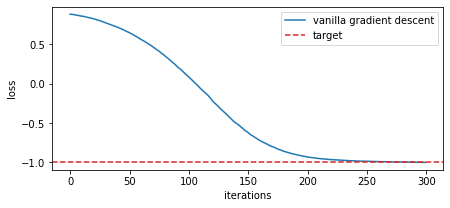

In [48]:
x_opt, fx_opt, nfevs = gd.optimize(
    initial_point.size,    # number of parameters
    evaluate_expectation,  # function to minimize
    gradient_function=evaluate_gradient,  # function to evaluate gradient
    initial_point=initial_point  # initial point
)

import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 3))
plt.plot(gd_loss, label='vanilla gradient descent')
plt.axhline(-1, ls='--', c='C3', label='target')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend();

In [49]:
from qiskit.opflow import NaturalGradient

In [50]:
natural_gradient = (NaturalGradient(regularization='ridge')
                    .convert(expectation))
natural_gradient_in_pauli_basis = PauliExpectation().convert(
                                                    natural_gradient)
sampler = CircuitSampler(quantum_instance, caching="all")

def evaluate_natural_gradient(x):
    value_dict = dict(zip(ansatz.parameters, x))
    result = sampler.convert(natural_gradient, params=value_dict).eval()  
    return np.real(result)    

print('Vanilla gradient:', evaluate_gradient(initial_point))
print('Natural gradient:', evaluate_natural_gradient(initial_point))

Vanilla gradient: [ 0.13989258 -0.35095215 -0.25402832 -0.22497559]


/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Natural gradient: [ 0.71587162 -0.86457208 -0.980863   -0.33820254]


/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/evanrabeaux/.pyenv/versions/miniforge3-

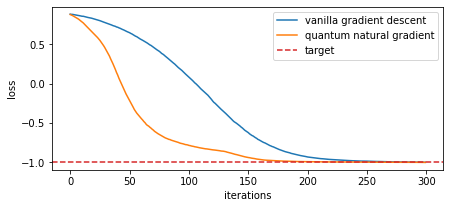

In [51]:
qng_loss = []
def qng_callback(nfevs, x, fx, stepsize):
    qng_loss.append(fx)

qng = GradientDescent(maxiter=300,
                      learning_rate=0.01,
                      callback=qng_callback)

x_opt, fx_opt, nfevs = (
    qng.optimize(initial_point.size, 
                 evaluate_expectation, 
                 gradient_function=evaluate_natural_gradient,
                 initial_point=initial_point))

# Plot loss
plt.figure(figsize=(7, 3))
plt.plot(gd_loss, 'C0', label='vanilla gradient descent')
plt.plot(qng_loss, 'C1', label='quantum natural gradient')
plt.axhline(-1, c='C3', ls='--', label='target')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend();

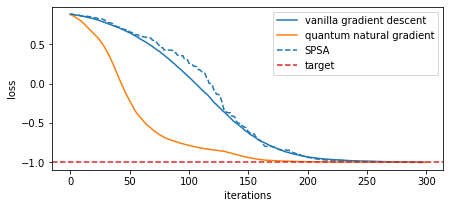

In [52]:
from qiskit.algorithms.optimizers import SPSA

spsa_loss = []
def spsa_callback(nfev, x, fx, stepsize, accepted):
    spsa_loss.append(fx)

spsa = SPSA(maxiter=300, learning_rate=0.01,
            perturbation=0.01, callback=spsa_callback)

x_opt, fx_opt, nfevs = spsa.optimize(initial_point.size, 
                                     evaluate_expectation, 
                                     initial_point=initial_point)

# Plot loss
plt.figure(figsize=(7, 3))
plt.plot(gd_loss, 'C0', label='vanilla gradient descent')
plt.plot(qng_loss, 'C1', label='quantum natural gradient')
plt.plot(spsa_loss, 'C0', ls='--', label='SPSA')
plt.axhline(-1, c='C3', ls='--', label='target')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend();

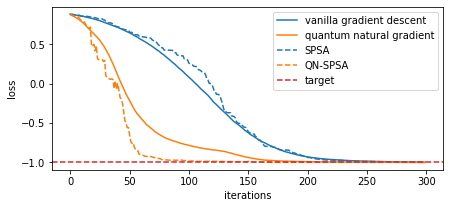

In [53]:
from qiskit.algorithms.optimizers import QNSPSA

qnspsa_loss = []
def qnspsa_callback(nfev, x, fx, stepsize, accepted):
    qnspsa_loss.append(fx)

fidelity = QNSPSA.get_fidelity(ansatz,
                               quantum_instance,
                               expectation=PauliExpectation())
qnspsa = QNSPSA(fidelity, maxiter=300, learning_rate=0.01,
                                       perturbation=0.01,
                                       callback=qnspsa_callback)

x_opt, fx_opt, nfevs = qnspsa.optimize(initial_point.size, 
                                       evaluate_expectation, 
                                       initial_point=initial_point)

# Plot loss
plt.figure(figsize=(7, 3))
plt.plot(gd_loss, 'C0', label='vanilla gradient descent')
plt.plot(qng_loss, 'C1', label='quantum natural gradient')
plt.plot(spsa_loss, 'C0', ls='--', label='SPSA')
plt.plot(qnspsa_loss, 'C1', ls='--', label='QN-SPSA')
plt.axhline(-1, c='C3', ls='--', label='target')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend();

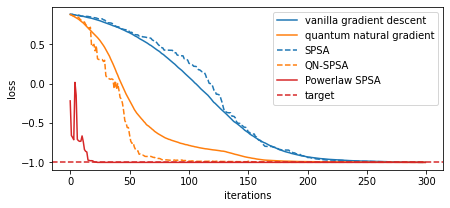

In [54]:
autospsa_loss = []
def autospsa_callback(nfev, x, fx, stepsize, accepted):
    autospsa_loss.append(fx)

autospsa = SPSA(maxiter=300,
                learning_rate=None,
                perturbation=None,
                callback=autospsa_callback)

x_opt, fx_opt, nfevs = autospsa.optimize(initial_point.size, 
                                         evaluate_expectation, 
                                         initial_point=initial_point)

# Plot loss
plt.figure(figsize=(7, 3))
plt.plot(gd_loss, 'C0', label='vanilla gradient descent')
plt.plot(qng_loss, 'C1', label='quantum natural gradient')
plt.plot(spsa_loss, 'C0', ls='--', label='SPSA')
plt.plot(qnspsa_loss, 'C1', ls='--', label='QN-SPSA')
plt.plot(autospsa_loss, 'C3', label='Powerlaw SPSA')
plt.axhline(-1, c='C3', ls='--', label='target')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend();

In [55]:
from qiskit.opflow import I

def sample_gradients(num_qubits, reps, local=False):
    """Sample the gradient of our model for ``num_qubits`` qubits and
    ``reps`` repetitions.
    
    We sample 100 times for random parameters and compute the gradient
    of the first RY rotation gate.
    """
    index = num_qubits - 1

    # local or global operator
    if local:
        operator = Z ^ Z ^ (I ^ (num_qubits - 2))
    else:
        operator = Z ^ num_qubits
    
    # real amplitudes ansatz
    ansatz = RealAmplitudes(num_qubits, entanglement='linear', reps=reps)

    # construct Gradient we want to evaluate for different values
    expectation = StateFn(operator,
                          is_measurement=True).compose(StateFn(ansatz))
    grad = Gradient().convert(expectation,
                              params=ansatz.parameters[index])
    
    # evaluate for 100 different, random parameter values
    num_points = 100
    grads = []
    for _ in range(num_points):
        # points are uniformly chosen from [0, pi]
        point = np.random.uniform(0, np.pi, ansatz.num_parameters)
        value_dict = dict(zip(ansatz.parameters, point))
        grads.append(sampler.convert(grad, value_dict).eval())

    return grads

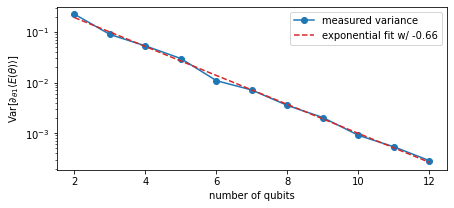

In [56]:
num_qubits = list(range(2, 13))
reps = num_qubits  # number of layers = numbers of qubits
gradients = [sample_gradients(n, r) for n, r in zip(num_qubits, reps)]  

fit = np.polyfit(num_qubits, np.log(np.var(gradients, axis=1)), deg=1)
x = np.linspace(num_qubits[0], num_qubits[-1], 200)

plt.figure(figsize=(7, 3))
plt.semilogy(num_qubits,
             np.var(gradients, axis=1),
             'o-',
             label='measured variance')
plt.semilogy(x,
             np.exp(fit[0] * x + fit[1]),
             '--', c='C3',
             label=f'exponential fit w/ {fit[0]:.2f}')
plt.xlabel('number of qubits')
plt.ylabel(r'$\mathrm{Var}[\partial_{\theta 1}\langle E(\theta)\rangle]$')
plt.legend(loc='best');

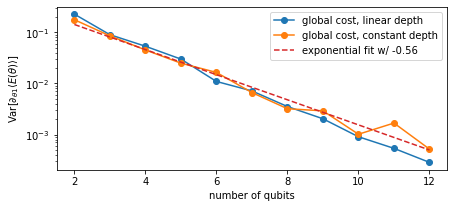

In [57]:
num_qubits = list(range(2, 13))
fixed_depth_global_gradients = [sample_gradients(n, 1) for n in num_qubits]  

fit = np.polyfit(num_qubits, np.log(np.var(fixed_depth_global_gradients,
                                           axis=1)), deg=1)
x = np.linspace(num_qubits[0], num_qubits[-1], 200)

plt.figure(figsize=(7, 3))
plt.semilogy(num_qubits,
             np.var(gradients, axis=1),
             'o-',
             label='global cost, linear depth')
plt.semilogy(num_qubits, np.var(fixed_depth_global_gradients, axis=1),
             'o-',
             label='global cost, constant depth')
plt.semilogy(x,
             np.exp(fit[0] * x + fit[1]),
             '--', c='C3',
             label=f'exponential fit w/ {fit[0]:.2f}')
plt.xlabel('number of qubits')
plt.ylabel(r'$\mathrm{Var}[\partial_{\theta 1}\langle E(\theta)\rangle]$')
plt.legend(loc='best');

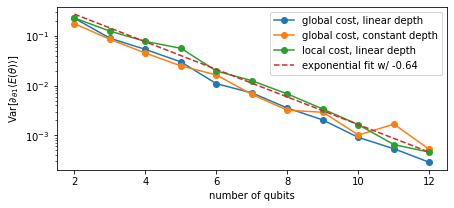

In [58]:
num_qubits = list(range(2, 13))
linear_depth_local_gradients = [sample_gradients(n, n,
                                            local=True) for n in num_qubits]  

fit = np.polyfit(num_qubits,
                 np.log(np.var(linear_depth_local_gradients,axis=1)),
                 deg=1)
x = np.linspace(num_qubits[0], num_qubits[-1], 200)

plt.figure(figsize=(7, 3))
plt.semilogy(num_qubits, np.var(gradients, axis=1), 'o-',
             label='global cost, linear depth')
plt.semilogy(num_qubits, np.var(fixed_depth_global_gradients, axis=1), 'o-',
             label='global cost, constant depth')
plt.semilogy(num_qubits, np.var(linear_depth_local_gradients, axis=1), 'o-',
             label='local cost, linear depth')
plt.semilogy(x, np.exp(fit[0] * x + fit[1]), '--', c='C3',
             label=f'exponential fit w/ {fit[0]:.2f}')
plt.xlabel('number of qubits')
plt.ylabel(r'$\mathrm{Var}[\partial_{\theta 1} \langle E(\theta) \rangle]$')
plt.legend(loc='best');

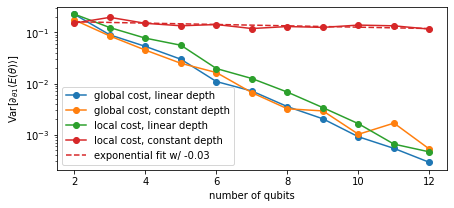

In [59]:
num_qubits = list(range(2, 13))
fixed_depth_local_gradients = [sample_gradients(n, 1,
                                            local=True) for n in num_qubits]  

fit = np.polyfit(num_qubits,
                 np.log(np.var(fixed_depth_local_gradients, axis=1)),
                 deg=1)

x = np.linspace(num_qubits[0], num_qubits[-1], 200)

plt.figure(figsize=(7, 3))
plt.semilogy(num_qubits, np.var(gradients, axis=1), 'o-',
             label='global cost, linear depth')
plt.semilogy(num_qubits, np.var(fixed_depth_global_gradients, axis=1), 'o-',
             label='global cost, constant depth')
plt.semilogy(num_qubits, np.var(linear_depth_local_gradients, axis=1), 'o-',
             label='local cost, linear depth')
plt.semilogy(num_qubits, np.var(fixed_depth_local_gradients, axis=1), 'o-', 
             label='local cost, constant depth')
plt.semilogy(x, np.exp(fit[0] * x + fit[1]), '--', c='C3', 
             label=f'exponential fit w/ {fit[0]:.2f}')
plt.xlabel('number of qubits')
plt.ylabel(r'$\mathrm{Var}[\partial_{\theta 1} \langle E(\theta) \rangle]$')
plt.legend(loc='best');

In [60]:
num_qubits = 6
operator = Z ^ Z ^ (I ^ (num_qubits - 4))

def minimize(circuit, optimizer):
    initial_point = np.random.random(circuit.num_parameters)
    
    exp = StateFn(operator, is_measurement=True) @ StateFn(circuit)
    grad = Gradient().convert(exp)
    
    exp = PauliExpectation().convert(exp)
    grad = PauliExpectation().convert(grad)

    sampler = CircuitSampler(quantum_instance, caching="all")
    
    def loss(x):
        values_dict = dict(zip(circuit.parameters, x))
        return np.real(sampler.convert(exp, values_dict).eval())
    
    def gradient(x):
        values_dict = dict(zip(circuit.parameters, x))
        return np.real(sampler.convert(grad, values_dict).eval())

    return optimizer.optimize(circuit.num_parameters,
                              loss, gradient,
                              initial_point=initial_point)

def layerwise_training(ansatz, max_num_layers, optimizer):
    optimal_parameters = []
    fopt = None
    for reps in range(1, max_num_layers):
        ansatz.reps = reps
     
        # fix the already optimized parameters
        values_dict = dict(zip(ansatz.parameters, optimal_parameters))

        # mark parameters that need to be optimized
        partially_bound = ansatz.bind_parameters(values_dict)

        xopt, fopt, _ = minimize(partially_bound, optimizer)
        print('Layer:', reps, ' Best Value:', fopt)
        optimal_parameters += list(xopt)

    return fopt, optimal_parameters

ansatz = RealAmplitudes(4, entanglement='linear')
optimizer = GradientDescent(maxiter=50)

np.random.seed(12)  # for reproducibility
fopt, optimal_parameters = layerwise_training(ansatz, 4, optimizer)

Layer: 1  Best Value: 0.2421875


/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/evanrabeaux/.pyenv/versions/miniforge3-4.10.1-5/envs/QiskitDevEnv2/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Layer: 2  Best Value: -0.14428710937499992
Layer: 3  Best Value: -0.513427734375


In [61]:
import qiskit.tools.jupyter
%qiskit_version_table

In [62]:
#Supervised Learning

In [63]:
#Variational Classification

In [64]:
from qiskit.utils import algorithm_globals
algorithm_globals.random_seed = 3142

import numpy as np
np.random.seed(algorithm_globals.random_seed)

from qiskit_machine_learning.datasets import ad_hoc_data

train_data, train_labels, test_data, test_labels= (
    ad_hoc_data(training_size=20, test_size=5, n=2, gap=0.3, one_hot=False))

In [65]:
from qiskit.circuit.library import ZZFeatureMap, TwoLocal

adhoc_feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
adhoc_var_form = TwoLocal(2, ['ry', 'rz'], 'cz', reps=2)

adhoc_circuit = adhoc_feature_map.compose(adhoc_var_form)
adhoc_circuit.measure_all()
adhoc_circuit.decompose().draw()

┌───┐┌─────────────┐                                          ┌───┐»
   q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■──┤ H ├»
        ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐├───┤»
   q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
        └───┘└─────────────┘└───┘└──────────────────────────────┘└───┘└───┘»
meas: 2/═══════════════════════════════════════════════════════════════════»
                                                                           »
«        ┌─────────────┐                                          ┌──────────┐»
«   q_0: ┤ P(2.0*x[0]) ├──■────────────────────────────────────■──┤ Ry(θ[0]) ├»
«        ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐├──────────┤»
«   q_1: ┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ Ry(θ[1]) ├»
«        └─────────────┘└───┘└──────────────────────────────┘└───┘└──────────┘»
«meas: 2/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«        ┌──────────┐   ┌──────────┐┌──────────┐   ┌──────────┐┌───────────┐ ░ »
«   q_0: ┤ Rz(θ[2]) ├─■─┤ Ry(θ[4]) ├┤ Rz(θ[6]) ├─■─┤ Ry(θ[8]) ├┤ Rz(θ[10]) ├─░─»
«        ├──────────┤ │ ├──────────┤├──────────┤ │ ├──────────┤├───────────┤ ░ »
«   q_1: ┤ Rz(θ[3]) ├─■─┤ Ry(θ[5]) ├┤ Rz(θ[7]) ├─■─┤ Ry(θ[9]) ├┤ Rz(θ[11]) ├─░─»
«        └──────────┘   └──────────┘└──────────┘   └──────────┘└───────────┘ ░ »
«meas: 2/══════════════════════════════════════════════════════════════════════»
«                                                                              »
«        ┌─┐   
«   q_0: ┤M├───
«        └╥┘┌─┐
«   q_1: ─╫─┤M├
«         ║ └╥┘
«meas: 2/═╩══╩═
«         0  1

In [66]:
def circuit_parameters(data, variational):
    parameters = {}
    for i, p in enumerate(adhoc_feature_map.ordered_parameters):
        parameters[p] = data[i]
    for i, p in enumerate(adhoc_var_form.ordered_parameters):
        parameters[p] = variational[i]
    return parameters

In [67]:
def assign_label(bitstring):
    hamming_weight = sum([int(k) for k in list(bitstring)])
    odd = hamming_weight & 1
    if odd:
        return 0
    else:
        return 1

In [68]:
def label_probability(results):
    shots = sum(results.values())
    probabilities = {0: 0, 1: 0}
    for bitstring, counts in results.items():
        label = assign_label(bitstring)
        probabilities[label] += counts / shots
    return probabilities

In [69]:
from qiskit import BasicAer, execute

def classification_probability(data, variational):
    circuits = [adhoc_circuit.assign_parameters(
        circuit_parameters(d,variational)) for d in data]
    backend = BasicAer.get_backend('qasm_simulator')
    results =  execute(circuits, backend).result()

    classification = [label_probability(results.get_counts(c)) for c in circuits]
    return classification

In [70]:
def cross_entropy_loss(predictions, expected):
    p = predictions.get(expected)
    return -(expected*np.log(p)+(1-expected)*np.log(1-p))
   
def cost_function(data, labels, variational):
    classifications = classification_probability(data, variational)

    cost = 0
    for i, classification in enumerate(classifications):
        cost += cross_entropy_loss(classification, labels[i])
    cost /= len(data)

    return cost

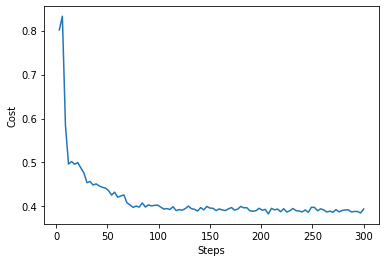

In [71]:
# Callback function for optimiser for plotting purposes
def store_intermediate_result(evaluation, parameter, cost, 
                              stepsize, accept):
    evaluations.append(evaluation)
    parameters.append(parameter)
    costs.append(cost)

# Set up the optimization
from qiskit.algorithms.optimizers import SPSA

parameters = []
costs = []
evaluations = []

optimizer = SPSA(maxiter=100, callback=store_intermediate_result)

#initial_point = np.random.random(adhoc_var_form.num_parameters)
initial_point = np.array([3.28559355, 5.48514978, 5.13099949,
                          0.88372228, 4.08885928, 2.45568528,
                          4.92364593, 5.59032015, 3.66837805,
                          4.84632313, 3.60713748, 2.43546])

objective_function = lambda variational: cost_function(train_data,
                                                       train_labels,
                                                       variational)

# Run the optimization
opt_var, opt_value, _ = optimizer.optimize(len(initial_point), objective_function, initial_point=initial_point)

import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(evaluations, costs)
plt.xlabel('Steps')
plt.ylabel('Cost')
plt.show()

In [72]:
def score_classifier(data, labels, variational):
    probability = classification_probability(data, variational)

    prediction = [0 if p[0] >= p[1] else 1 for p in probability]
    
    accuracy = 0
    for i, p in enumerate(probability):
        if (p[0] >= p[1]) and (labels[i] == 0):
            accuracy += 1
        elif (p[1]) >= p[0] and (labels[i] == 1):
            accuracy += 1
    accuracy /= len(labels)
    return accuracy, prediction

accuracy, prediction = score_classifier(test_data, test_labels, opt_var)
accuracy

0.4

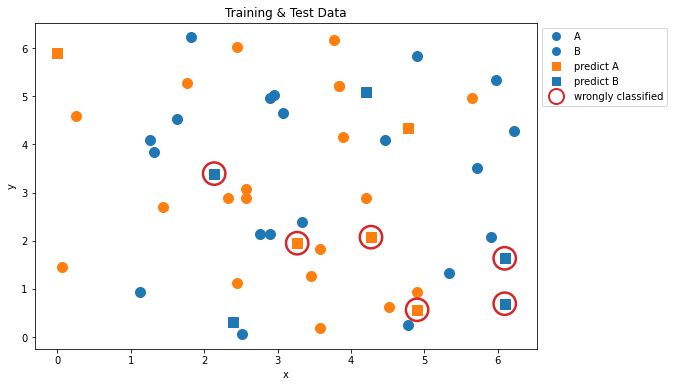

In [73]:
from matplotlib.lines import Line2D
plt.figure(figsize=(9, 6))

for feature, label in zip(train_data, train_labels):
    marker = 'o' 
    color = 'C0' if label == 0 else 'C1'
    plt.scatter(feature[0], feature[1],
                marker=marker, s=100, color=color)
    
for feature, label, pred in zip(test_data, test_labels, prediction):
    marker = 's' 
    color = 'C0' if pred == 0 else 'C1'
    plt.scatter(feature[0], feature[1],
                marker=marker, s=100, color=color)
    if label != pred:  # mark wrongly classified
        plt.scatter(feature[0], feature[1], marker='o', s=500,
                    linewidths=2.5, facecolor='none', edgecolor='C3')

legend_elements = [
    Line2D([0], [0], marker='o', c='w', mfc='C0', label='A', ms=10),
    Line2D([0], [0], marker='o', c='w', mfc='C0', label='B', ms=10),
    Line2D([0], [0], marker='s', c='w', mfc='C1', label='predict A',
           ms=10),
    Line2D([0], [0], marker='s', c='w', mfc='C0', label='predict B',
           ms=10),
    Line2D([0], [0], marker='o', c='w', mfc='none', mec='C3',
           label='wrongly classified', mew=2, ms=15)
]

plt.legend(handles=legend_elements, bbox_to_anchor=(1, 1),
           loc='upper left')
    
plt.title('Training & Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [74]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
train_labels_oh = encoder.fit_transform(train_labels.reshape(-1, 1)).toarray()
test_labels_oh = encoder.fit_transform(test_labels.reshape(-1, 1)).toarray()

In [75]:
parameters = []
costs = []
evaluations = []

#initial_point = np.random.random(adhoc_var_form.num_parameters)
initial_point = np.array([0.3200227 , 0.6503638 , 0.55995053,
                          0.96566328, 0.38243769, 0.90403094,
                          0.82271449, 0.26810137, 0.61076489,
                          0.82301609, 0.11789148, 0.29667125])

from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(feature_map=adhoc_feature_map,
          ansatz=adhoc_var_form,
          loss='cross_entropy',
          optimizer=SPSA(callback=store_intermediate_result),
          initial_point=initial_point,
          quantum_instance=BasicAer.get_backend('qasm_simulator'))

vqc.fit(train_data, train_labels_oh)

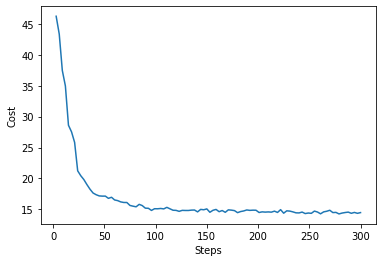

In [76]:
fig = plt.figure()
plt.plot(evaluations, costs)
plt.xlabel('Steps')
plt.ylabel('Cost')
plt.show()

In [77]:
vqc.score(test_data, test_labels_oh)

1.0

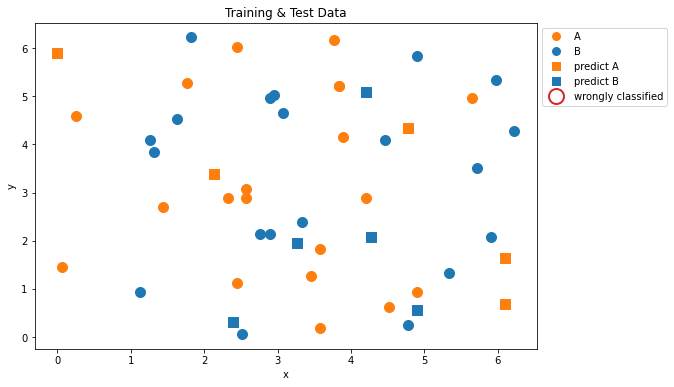

In [78]:
from matplotlib.lines import Line2D
plt.figure(figsize=(9, 6))

for feature, label in zip(train_data, train_labels_oh):
    color = 'C1' if label[0] == 0 else 'C0'
    plt.scatter(feature[0], feature[1], marker='o', s=100,
                color=color)
    
for feature, label, pred in zip(test_data, test_labels_oh,
                                vqc.predict(test_data)): 
    color = 'C1' if pred[0] == 0 else 'C0'
    plt.scatter(feature[0], feature[1], marker='s', s=100, color=color)
    if not np.array_equal(label,pred):  # mark wrongly classified
        plt.scatter(feature[0], feature[1], marker='o', s=500,
                    linewidths=2.5, facecolor='none', edgecolor='C3')

legend_elements = [
    Line2D([0], [0], marker='o', c='w', mfc='C1', label='A', ms=10),
    Line2D([0], [0], marker='o', c='w', mfc='C0', label='B', ms=10),
    Line2D([0], [0], marker='s', c='w', mfc='C1', label='predict A',
           ms=10),
    Line2D([0], [0], marker='s', c='w', mfc='C0', label='predict B',
           ms=10),
    Line2D([0], [0], marker='o', c='w', mfc='none', mec='C3',
           label='wrongly classified', mew=2, ms=15)
]

plt.legend(handles=legend_elements, bbox_to_anchor=(1, 1),
           loc='upper left')
    
plt.title('Training & Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [79]:
import qiskit.tools.jupyter
%qiskit_version_table

In [80]:
#Quantum Features Map and Kernel

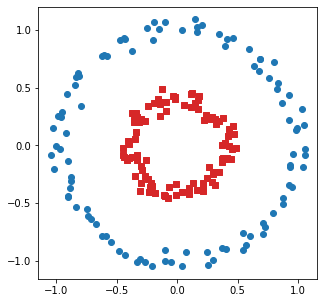

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.datasets import make_circles

# Create circles dataset
X, Y = make_circles(n_samples=200, noise=0.05, factor=0.4)

# Separate smaller and larger circles
A = X[np.where(Y==0)]
B = X[np.where(Y==1)]

# Plot in 2D
plt.figure(figsize=(5,5))
plt.scatter(A[:,0],A[:,1], marker='o')
plt.scatter(B[:,0],B[:,1], marker='s', c='C3')
plt.show()

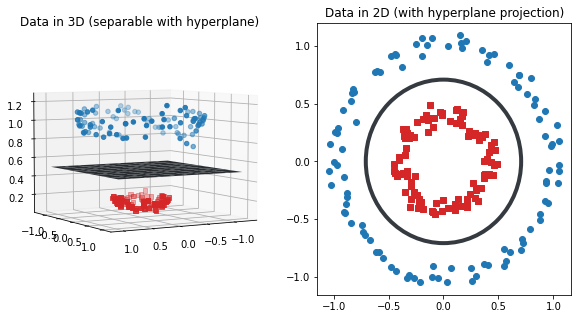

In [82]:
def transform_function(x, y):
    """ Implements f(x,y) = [x, y, z = x^2 + y^2] """
    return np.array([x, y, x**2.0 + y**2.0])

# Transform
A1 = np.array([transform_function(x,y) for 
               x,y in zip(np.ravel(A[:,0]), np.ravel(A[:,1]))])
B1 = np.array([transform_function(x,y) 
               for x,y in zip(np.ravel(B[:,0]), np.ravel(B[:,1]))])

# Plot in 3D
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
ax.set_title("Data in 3D (separable with hyperplane)")
ax.scatter(A1[:,0], A1[:,1], A1[:,2], marker='o')
ax.scatter(B1[:,0], B1[:,1], B1[:,2], marker='s',
           c='C3')  # make red
ax.view_init(5, 60)

x = np.arange(-1.25, 1.25, 0.25)
y = np.arange(-1.25, 1.25, 0.26)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z[:,:] = 0.5
ax.plot_surface(X, Y, Z, color='#343A3F')

# Project data to 2D
ax2d = fig.add_subplot(122)
ax2d.set_title("Data in 2D (with hyperplane projection)")
ax2d.scatter(A1[:,0], A1[:,1], marker='o')
ax2d.scatter(B1[:,0], B1[:,1], marker='s',
            c='C3')  # make red

ax2d.add_patch(pl.Circle((0,0), radius=np.sqrt(0.5),
               fill=False, linestyle='solid', linewidth=4.0,
               color='#343A3F'))

plt.show()

In [83]:
from qiskit.circuit.library import ZZFeatureMap

# 3 features, depth 1
map_zz = ZZFeatureMap(feature_dimension=3, reps=1)
map_zz.decompose().draw()

┌───┐┌─────────────┐                                               »
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■────■──»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     └───┘└─────────────┘                                          └───┘»
«                                               »
«q_0: ──────────────────────────────────■───────»
«                                       │       »
«q_1: ──────────────────────────────────┼────■──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐»
«q_2: ┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├»
«     └──────────────────────────────┘└───┘└───┘»
«                                          
«q_0: ─────────────────────────────────────
«                                          
«q_1: ──────────────────────────────────■──
«     ┌──────────────────────────────┐┌─┴─┐
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├
«     └──────────────────────────────┘└───┘

In [84]:
from qiskit.utils import algorithm_globals
algorithm_globals.random_seed = 12345

from qiskit_machine_learning.datasets import ad_hoc_data

train_data, train_labels, test_data, test_labels, sample_total = (
    ad_hoc_data(training_size=20, test_size=5, n=2, gap=0.3, 
                include_sample_total=True, one_hot=False))

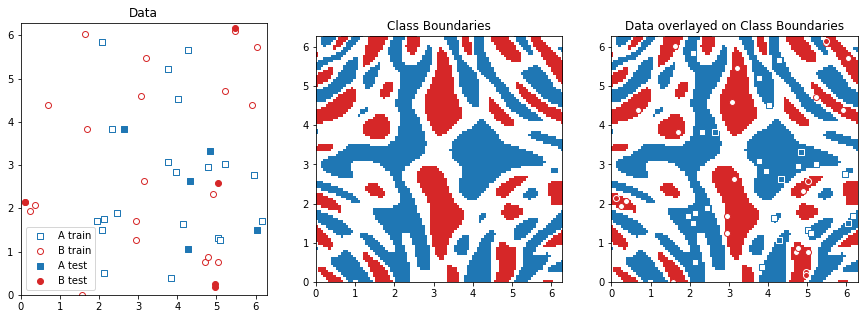

In [85]:
# Plot data and class boundaries
fig = plt.figure(figsize=(15, 5))
axdata = fig.add_subplot(131)
axdata.set_title("Data")
axdata.set_ylim(0, 2 * np.pi)
axdata.set_xlim(0, 2 * np.pi)

plt.scatter(train_data[np.where(train_labels[:] == 0), 0],
            train_data[np.where(train_labels[:] == 0), 1],
            marker='s', facecolors='w', edgecolors='C0',
            label="A train")
plt.scatter(train_data[np.where(train_labels[:] == 1), 0],
            train_data[np.where(train_labels[:] == 1), 1],
            marker='o', facecolors='w', edgecolors='C3',
            label="B train")
plt.scatter(test_data[np.where(test_labels[:] == 0), 0],
            test_data[np.where(test_labels[:] == 0), 1],
            marker='s', facecolors='C0', label="A test")
plt.scatter(test_data[np.where(test_labels[:] == 1), 0],
            test_data[np.where(test_labels[:] == 1), 1],
            marker='o', facecolors='C3', label="B test")
plt.legend()

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["C3","w","C0"])

axmap = fig.add_subplot(132)
axmap.set_title("Class Boundaries")
axmap.set_ylim(0, 2 * np.pi)
axmap.set_xlim(0, 2 * np.pi)
axmap.imshow(np.asmatrix(sample_total).T,
             interpolation='nearest',
             origin='lower', cmap=cmap,
             extent=[0, 2 * np.pi, 0, 2 * np.pi])

axboth = fig.add_subplot(133)
axboth.set_title("Data overlayed on Class Boundaries")
axboth.set_ylim(0, 2 * np.pi)
axboth.set_xlim(0, 2 * np.pi)
axboth.imshow(np.asmatrix(sample_total).T, interpolation='nearest',
              origin='lower', cmap=cmap,
              extent=[0, 2 * np.pi, 0, 2 * np.pi])
axboth.scatter(train_data[np.where(train_labels[:] == 0), 0],
               train_data[np.where(train_labels[:] == 0), 1],
               marker='s', facecolors='w', edgecolors='C0', label="A")
axboth.scatter(train_data[np.where(train_labels[:] == 1), 0],
               train_data[np.where(train_labels[:] == 1), 1],
               marker='o', facecolors='w', edgecolors='C3', label="B")
axboth.scatter(test_data[np.where(test_labels[:] == 0), 0],
               test_data[np.where(test_labels[:] == 0), 1],
               marker='s', facecolors='C0', edgecolors='w',
               label="A test")
axboth.scatter(test_data[np.where(test_labels[:] == 1), 0],
               test_data[np.where(test_labels[:] == 1), 1],
               marker='o', facecolors='C3', edgecolors='w',
               label="B test")

plt.show()

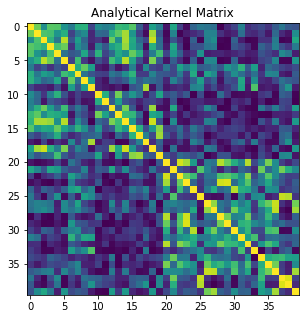

In [86]:
import qiskit.opflow as opflow

def calculate_kernel(feature_map, x_data, y_data=None):
    """ 
        Calculates  kernel matrix from provided feature map and
        dataset(s), x & (y). If y isn't given, self inner product
        of x is calculated. 
        
        No error checking is performed, feature map and datasets
        assumed to have the same dimension
    """

    if y_data is None:
        y_data = x_data

    # Use Operator Flow to create a list of feature map circuits,
    # parameterized by each datapoint
    x_circuits = opflow.CircuitStateFn(feature_map).bind_parameters(
        {param:vals for (param, vals) in zip(feature_map.parameters, 
                                         np.transpose(x_data).tolist())})

    y_circuits = opflow.CircuitStateFn(feature_map).bind_parameters(
        {param:vals for (param, vals) in zip(feature_map.parameters, 
                                         np.transpose(y_data).tolist())})

    # Compute the square of the conjugate inner product of the feature
    # map circuits: the kernel matrix
    kernel = np.abs(
        (~y_circuits.to_matrix_op() @ x_circuits.to_matrix_op()).eval()
    )**2
    
    return kernel

adhoc_feature_map = ZZFeatureMap(feature_dimension=2, reps=2)

kernel = calculate_kernel(adhoc_feature_map, train_data)

plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(kernel),interpolation='nearest', origin='upper')
plt.title("Analytical Kernel Matrix")
plt.show()

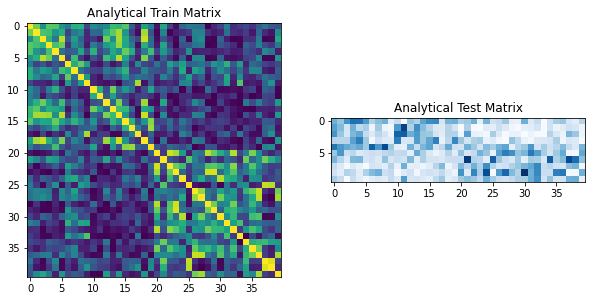

In [87]:
train_kernel = calculate_kernel(adhoc_feature_map, train_data)
test_kernel = calculate_kernel(adhoc_feature_map, train_data, test_data)

# plot analytical matrices
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(np.asmatrix(train_kernel), interpolation='nearest',
              origin='upper')
axs[0].set_title("Analytical Train Matrix")
axs[1].imshow(np.asmatrix(test_kernel), interpolation='nearest',
              origin='upper', cmap='Blues')
axs[1].set_title("Analytical Test Matrix")
plt.show()

In [88]:
from sklearn.svm import SVC

# train scikit-learn svm model
model = SVC(kernel='precomputed')
model.fit(train_kernel, train_labels)

print("Number of support vectors for each class:",model.n_support_)
print("Indices of support vectors:", model.support_)

Number of support vectors for each class: [ 9 10]
Indices of support vectors: [ 3  6  7  8  9 11 12 17 19 21 22 24 25 26 27 31 33 38 39]


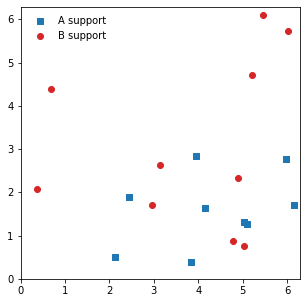

In [89]:
# Plot support vectors
plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)

plt.scatter(train_data[model.support_[0:model.n_support_[0] ], 0],
            train_data[model.support_[0:model.n_support_[0] ], 1],
            marker='s', label="A support")
plt.scatter(train_data[model.support_[model.n_support_[0]:], 0],
            train_data[model.support_[model.n_support_[0]:], 1],
            marker='o', c='C3', label="B support")
plt.legend(loc='upper left', frameon=False)
plt.show()

In [90]:
# test svm model
model.score(test_kernel, test_labels)

1.0

In [91]:
from qiskit import BasicAer
from qiskit_machine_learning.kernels import QuantumKernel

# Create the quantum feature map
adhoc_feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
# Create the quantum kernel
adhoc_kernel = QuantumKernel(feature_map=adhoc_feature_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))

# Set the SVC algorithm to use our custom kernel
adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)
adhoc_svc.fit(train_data, train_labels)
adhoc_svc.score(test_data, test_labels)

1.0

In [92]:
import qiskit.tools.jupyter
%qiskit_version_table

In [93]:
#Unsupervised Learning

In [94]:
#Quantum Generative Adverserial Networks

In [95]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

In [96]:
# Number of qubits needed to model real distribution
REAL_DIST_NQUBITS = 2

real_circuit = QuantumCircuit(REAL_DIST_NQUBITS)
real_circuit.h(0)
real_circuit.cx(0, 1);

In [97]:
# Importing qiskit machine learning parameters
from qiskit.circuit import Parameter, ParameterVector

In [98]:
from qiskit.circuit.library import TwoLocal
generator = TwoLocal(REAL_DIST_NQUBITS,
                     # Parameterized single qubit rotations
                     ['ry', 'rz'],
                     'cz',  # Entangling gate
                     'full', # Entanglement structure: all to all
                     reps=2, # Number of layers
                     parameter_prefix='θ_g', 
                     name='Generator')
generator = generator.decompose() # decompose into standard gates
generator.draw()

┌────────────┐┌────────────┐   ┌────────────┐┌────────────┐   »
q_0: ┤ Ry(θ_g[0]) ├┤ Rz(θ_g[2]) ├─■─┤ Ry(θ_g[4]) ├┤ Rz(θ_g[6]) ├─■─»
     ├────────────┤├────────────┤ │ ├────────────┤├────────────┤ │ »
q_1: ┤ Ry(θ_g[1]) ├┤ Rz(θ_g[3]) ├─■─┤ Ry(θ_g[5]) ├┤ Rz(θ_g[7]) ├─■─»
     └────────────┘└────────────┘   └────────────┘└────────────┘   »
«     ┌────────────┐┌─────────────┐
«q_0: ┤ Ry(θ_g[8]) ├┤ Rz(θ_g[10]) ├
«     ├────────────┤├─────────────┤
«q_1: ┤ Ry(θ_g[9]) ├┤ Rz(θ_g[11]) ├
«     └────────────┘└─────────────┘

In [99]:
disc_weights = ParameterVector('θ_d', 12)

discriminator = QuantumCircuit(3, name="Discriminator")
discriminator.barrier()
discriminator.h(0)
discriminator.rx(disc_weights[0], 0)
discriminator.ry(disc_weights[1], 0)
discriminator.rz(disc_weights[2], 0)

discriminator.rx(disc_weights[3], 1)
discriminator.ry(disc_weights[4], 1)
discriminator.rz(disc_weights[5], 1)

discriminator.rx(disc_weights[6], 2)
discriminator.ry(disc_weights[7], 2)
discriminator.rz(disc_weights[8], 2)
discriminator.cx(0, 2)
discriminator.cx(1, 2)
discriminator.rx(disc_weights[9], 2)
discriminator.ry(disc_weights[10], 2)
discriminator.rz(disc_weights[11], 2)

discriminator.draw()

░     ┌───┐     ┌────────────┐┌────────────┐┌────────────┐          »
q_0: ─░─────┤ H ├─────┤ Rx(θ_d[0]) ├┤ Ry(θ_d[1]) ├┤ Rz(θ_d[2]) ├──■───────»
      ░ ┌───┴───┴────┐├────────────┤├────────────┤└────────────┘  │       »
q_1: ─░─┤ Rx(θ_d[3]) ├┤ Ry(θ_d[4]) ├┤ Rz(θ_d[5]) ├────────────────┼────■──»
      ░ ├────────────┤├────────────┤├────────────┤              ┌─┴─┐┌─┴─┐»
q_2: ─░─┤ Rx(θ_d[6]) ├┤ Ry(θ_d[7]) ├┤ Rz(θ_d[8]) ├──────────────┤ X ├┤ X ├»
      ░ └────────────┘└────────────┘└────────────┘              └───┘└───┘»
«                                                 
«q_0: ────────────────────────────────────────────
«                                                 
«q_1: ────────────────────────────────────────────
«     ┌────────────┐┌─────────────┐┌─────────────┐
«q_2: ┤ Rx(θ_d[9]) ├┤ Ry(θ_d[10]) ├┤ Rz(θ_d[11]) ├
«     └────────────┘└─────────────┘└─────────────┘

In [100]:
N_GPARAMS = generator.num_parameters
N_DPARAMS = discriminator.num_parameters

# Need extra qubit for the discriminator
gen_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS+1)
gen_disc_circuit.compose(generator, inplace=True)
gen_disc_circuit.compose(discriminator, inplace=True)
gen_disc_circuit.draw()

┌────────────┐┌────────────┐   ┌────────────┐┌────────────┐   »
q_0: ┤ Ry(θ_g[0]) ├┤ Rz(θ_g[2]) ├─■─┤ Ry(θ_g[4]) ├┤ Rz(θ_g[6]) ├─■─»
     ├────────────┤├────────────┤ │ ├────────────┤├────────────┤ │ »
q_1: ┤ Ry(θ_g[1]) ├┤ Rz(θ_g[3]) ├─■─┤ Ry(θ_g[5]) ├┤ Rz(θ_g[7]) ├─■─»
     └────────────┘└────────────┘   └────────────┘└────────────┘   »
q_2: ──────────────────────────────────────────────────────────────»
                                                                   »
«     ┌────────────┐┌─────────────┐ ░     ┌───┐     ┌────────────┐»
«q_0: ┤ Ry(θ_g[8]) ├┤ Rz(θ_g[10]) ├─░─────┤ H ├─────┤ Rx(θ_d[0]) ├»
«     ├────────────┤├─────────────┤ ░ ┌───┴───┴────┐├────────────┤»
«q_1: ┤ Ry(θ_g[9]) ├┤ Rz(θ_g[11]) ├─░─┤ Rx(θ_d[3]) ├┤ Ry(θ_d[4]) ├»
«     └────────────┘└─────────────┘ ░ ├────────────┤├────────────┤»
«q_2: ──────────────────────────────░─┤ Rx(θ_d[6]) ├┤ Ry(θ_d[7]) ├»
«                                   ░ └────────────┘└────────────┘»
«     ┌────────────┐┌────────────┐                                       »
«q_0: ┤ Ry(θ_d[1]) ├┤ Rz(θ_d[2]) ├──■────────────────────────────────────»
«     ├────────────┤└────────────┘  │                                    »
«q_1: ┤ Rz(θ_d[5]) ├────────────────┼────■───────────────────────────────»
«     ├────────────┤              ┌─┴─┐┌─┴─┐┌────────────┐┌─────────────┐»
«q_2: ┤ Rz(θ_d[8]) ├──────────────┤ X ├┤ X ├┤ Rx(θ_d[9]) ├┤ Ry(θ_d[10]) ├»
«     └────────────┘              └───┘└───┘└────────────┘└─────────────┘»
«                    
«q_0: ───────────────
«                    
«q_1: ───────────────
«     ┌─────────────┐
«q_2: ┤ Rz(θ_d[11]) ├
«     └─────────────┘

In [101]:
real_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS+1)
real_disc_circuit.compose(real_circuit, inplace=True)
real_disc_circuit.compose(discriminator, inplace=True)
real_disc_circuit.draw()

┌───┐      ░     ┌───┐     ┌────────────┐┌────────────┐┌────────────┐     »
q_0: ┤ H ├──■───░─────┤ H ├─────┤ Rx(θ_d[0]) ├┤ Ry(θ_d[1]) ├┤ Rz(θ_d[2]) ├──■──»
     └───┘┌─┴─┐ ░ ┌───┴───┴────┐├────────────┤├────────────┤└────────────┘  │  »
q_1: ─────┤ X ├─░─┤ Rx(θ_d[3]) ├┤ Ry(θ_d[4]) ├┤ Rz(θ_d[5]) ├────────────────┼──»
          └───┘ ░ ├────────────┤├────────────┤├────────────┤              ┌─┴─┐»
q_2: ───────────░─┤ Rx(θ_d[6]) ├┤ Ry(θ_d[7]) ├┤ Rz(θ_d[8]) ├──────────────┤ X ├»
                ░ └────────────┘└────────────┘└────────────┘              └───┘»
«                                                      
«q_0: ─────────────────────────────────────────────────
«                                                      
«q_1: ──■──────────────────────────────────────────────
«     ┌─┴─┐┌────────────┐┌─────────────┐┌─────────────┐
«q_2: ┤ X ├┤ Rx(θ_d[9]) ├┤ Ry(θ_d[10]) ├┤ Rz(θ_d[11]) ├
«     └───┘└────────────┘└─────────────┘└─────────────┘

In [102]:
# We'll use Statevector to retrieve statevector of given circuit
from qiskit.quantum_info import Statevector
import tensorflow as tf

def generator_cost(gen_params: tf.Tensor) -> float:
    # .numpy() method extracts numpy array from TF tensor
    curr_params = np.append(disc_params.numpy(),
                            gen_params.numpy())
    state_probs = Statevector(gen_disc_circuit
                              .bind_parameters(curr_params)
                             ).probabilities()
    # Get total prob of measuring |1> on q2
    prob_fake_true = np.sum(state_probs[0b100:])
    cost = -prob_fake_true 
    return cost

def discriminator_cost(disc_params: tf.Tensor) -> float:
    # .numpy() method extracts numpy array from TF tensor
    curr_params = np.append(disc_params.numpy(),
                            gen_params.numpy())
    gendisc_probs = Statevector(gen_disc_circuit
                                .bind_parameters(curr_params)
                               ).probabilities()
    realdisc_probs = Statevector(real_disc_circuit.
                                 bind_parameters(disc_params.numpy())
                                ).probabilities()
    
    # Get total prob of measuring |1> on q2
    prob_fake_true = np.sum(gendisc_probs[0b100:])
    # Get total prob of measuring |1> on q2
    prob_real_true = np.sum(realdisc_probs[0b100:])

    cost = prob_fake_true - prob_real_true
    return cost

ModuleNotFoundError: No module named 'tensorflow'

In [103]:
#Full Implementation II

In [104]:
from qiskit_finance.circuit.library import NormalDistribution

REAL_DIST_NQUBITS = 3

real_circuit = NormalDistribution(REAL_DIST_NQUBITS, mu=0, sigma=0.15)
real_circuit = real_circuit.decompose().decompose().decompose()
real_circuit.draw()

┌───────────────────────┐                        ┌───┐»
q_0: ┤ multiplex1_reverse_dg ├────────────────────────┤ X ├»
     └──────┬─────────┬──────┘┌───┐┌────────────┐┌───┐└─┬─┘»
q_1: ───────┤ Ry(π/2) ├───────┤ X ├┤ Ry(0.8367) ├┤ X ├──■──»
           ┌┴─────────┴─┐     └─┬─┘└────────────┘└─┬─┘     »
q_2: ──────┤ R(π/2,π/2) ├───────■──────────────────■───────»
           └────────────┘                                  »
«     ┌───────────────────────────────┐┌───┐»
«q_0: ┤ multiplex1_reverse_reverse_dg ├┤ X ├»
«     └───────────────────────────────┘└─┬─┘»
«q_1: ───────────────────────────────────┼──»
«                                        │  »
«q_2: ───────────────────────────────────■──»
«                                           »
«     ┌───────────────────────────────────────┐┌───┐»
«q_0: ┤ multiplex1_reverse_reverse_reverse_dg ├┤ X ├»
«     └───────────────────────────────────────┘└─┬─┘»
«q_1: ───────────────────────────────────────────■──»
«                                                   »
«q_2: ──────────────────────────────────────────────»
«                                                   »
«     ┌───────────────────────────────┐┌───┐
«q_0: ┤ multiplex1_reverse_reverse_dg ├┤ X ├
«     └───────────────────────────────┘└─┬─┘
«q_1: ───────────────────────────────────┼──
«                                        │  
«q_2: ───────────────────────────────────■──
«

In [105]:
generator = TwoLocal(REAL_DIST_NQUBITS,
                     # Parameterized single qubit rotations
                     ['ry', 'rz'],
                     'cz',  # Entangling gate
                     'full', # Entanglement structure - all to all
                     reps=2, # Number of layers
                     parameter_prefix='θ_g',
                     name='Generator')
generator = generator.decompose()
generator.draw()

┌────────────┐┌────────────┐      ┌────────────┐┌────────────┐»
q_0: ┤ Ry(θ_g[0]) ├┤ Rz(θ_g[3]) ├─■──■─┤ Ry(θ_g[6]) ├┤ Rz(θ_g[9]) ├»
     ├────────────┤├────────────┤ │  │ └────────────┘├────────────┤»
q_1: ┤ Ry(θ_g[1]) ├┤ Rz(θ_g[4]) ├─■──┼───────■───────┤ Ry(θ_g[7]) ├»
     ├────────────┤├────────────┤    │       │       ├────────────┤»
q_2: ┤ Ry(θ_g[2]) ├┤ Rz(θ_g[5]) ├────■───────■───────┤ Ry(θ_g[8]) ├»
     └────────────┘└────────────┘                    └────────────┘»
«                          ┌─────────────┐┌─────────────┐               
«q_0: ────────────────■──■─┤ Ry(θ_g[12]) ├┤ Rz(θ_g[15]) ├───────────────
«     ┌─────────────┐ │  │ └─────────────┘├─────────────┤┌─────────────┐
«q_1: ┤ Rz(θ_g[10]) ├─■──┼────────■───────┤ Ry(θ_g[13]) ├┤ Rz(θ_g[16]) ├
«     ├─────────────┤    │        │       ├─────────────┤├─────────────┤
«q_2: ┤ Rz(θ_g[11]) ├────■────────■───────┤ Ry(θ_g[14]) ├┤ Rz(θ_g[17]) ├
«     └─────────────┘                     └─────────────┘└─────────────┘

In [106]:
disc_weights = ParameterVector('θ_d', 12)
discriminator = QuantumCircuit(REAL_DIST_NQUBITS, name="Discriminator")
discriminator.barrier()
discriminator.h(0)
discriminator.rx(disc_weights[0], 0)
discriminator.ry(disc_weights[1], 0)
discriminator.rz(disc_weights[2], 0)

discriminator.h(1)
discriminator.rx(disc_weights[3], 1)
discriminator.ry(disc_weights[4], 1)
discriminator.rz(disc_weights[5], 1)

discriminator.h(2)
discriminator.rx(disc_weights[6], 2)
discriminator.ry(disc_weights[7], 2)
discriminator.rz(disc_weights[8], 2)
discriminator.cx(1,2)
discriminator.cx(0,2)
discriminator.rx(disc_weights[9], 2)
discriminator.ry(disc_weights[10], 2)
discriminator.rz(disc_weights[11], 2)
discriminator.draw()

░ ┌───┐┌────────────┐┌────────────┐┌────────────┐                        »
q_0: ─░─┤ H ├┤ Rx(θ_d[0]) ├┤ Ry(θ_d[1]) ├┤ Rz(θ_d[2]) ├───────■────────────────»
      ░ ├───┤├────────────┤├────────────┤├────────────┤       │                »
q_1: ─░─┤ H ├┤ Rx(θ_d[3]) ├┤ Ry(θ_d[4]) ├┤ Rz(θ_d[5]) ├──■────┼────────────────»
      ░ ├───┤├────────────┤├────────────┤├────────────┤┌─┴─┐┌─┴─┐┌────────────┐»
q_2: ─░─┤ H ├┤ Rx(θ_d[6]) ├┤ Ry(θ_d[7]) ├┤ Rz(θ_d[8]) ├┤ X ├┤ X ├┤ Rx(θ_d[9]) ├»
      ░ └───┘└────────────┘└────────────┘└────────────┘└───┘└───┘└────────────┘»
«                                   
«q_0: ──────────────────────────────
«                                   
«q_1: ──────────────────────────────
«     ┌─────────────┐┌─────────────┐
«q_2: ┤ Ry(θ_d[10]) ├┤ Rz(θ_d[11]) ├
«     └─────────────┘└─────────────┘

In [107]:
N_GPARAMS = generator.num_parameters
N_DPARAMS = discriminator.num_parameters

In [108]:
gen_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS)
gen_disc_circuit.compose(generator, inplace=True)
gen_disc_circuit.compose(discriminator, inplace=True)

gen_disc_circuit.draw()

┌────────────┐┌────────────┐      ┌────────────┐┌────────────┐»
q_0: ┤ Ry(θ_g[0]) ├┤ Rz(θ_g[3]) ├─■──■─┤ Ry(θ_g[6]) ├┤ Rz(θ_g[9]) ├»
     ├────────────┤├────────────┤ │  │ └────────────┘├────────────┤»
q_1: ┤ Ry(θ_g[1]) ├┤ Rz(θ_g[4]) ├─■──┼───────■───────┤ Ry(θ_g[7]) ├»
     ├────────────┤├────────────┤    │       │       ├────────────┤»
q_2: ┤ Ry(θ_g[2]) ├┤ Rz(θ_g[5]) ├────■───────■───────┤ Ry(θ_g[8]) ├»
     └────────────┘└────────────┘                    └────────────┘»
«                          ┌─────────────┐┌─────────────┐                ░ »
«q_0: ────────────────■──■─┤ Ry(θ_g[12]) ├┤ Rz(θ_g[15]) ├────────────────░─»
«     ┌─────────────┐ │  │ └─────────────┘├─────────────┤┌─────────────┐ ░ »
«q_1: ┤ Rz(θ_g[10]) ├─■──┼────────■───────┤ Ry(θ_g[13]) ├┤ Rz(θ_g[16]) ├─░─»
«     ├─────────────┤    │        │       ├─────────────┤├─────────────┤ ░ »
«q_2: ┤ Rz(θ_g[11]) ├────■────────■───────┤ Ry(θ_g[14]) ├┤ Rz(θ_g[17]) ├─░─»
«     └─────────────┘                     └─────────────┘└─────────────┘ ░ »
«     ┌───┐┌────────────┐┌────────────┐┌────────────┐                        »
«q_0: ┤ H ├┤ Rx(θ_d[0]) ├┤ Ry(θ_d[1]) ├┤ Rz(θ_d[2]) ├───────■────────────────»
«     ├───┤├────────────┤├────────────┤├────────────┤       │                »
«q_1: ┤ H ├┤ Rx(θ_d[3]) ├┤ Ry(θ_d[4]) ├┤ Rz(θ_d[5]) ├──■────┼────────────────»
«     ├───┤├────────────┤├────────────┤├────────────┤┌─┴─┐┌─┴─┐┌────────────┐»
«q_2: ┤ H ├┤ Rx(θ_d[6]) ├┤ Ry(θ_d[7]) ├┤ Rz(θ_d[8]) ├┤ X ├┤ X ├┤ Rx(θ_d[9]) ├»
«     └───┘└────────────┘└────────────┘└────────────┘└───┘└───┘└────────────┘»
«                                   
«q_0: ──────────────────────────────
«                                   
«q_1: ──────────────────────────────
«     ┌─────────────┐┌─────────────┐
«q_2: ┤ Ry(θ_d[10]) ├┤ Rz(θ_d[11]) ├
«     └─────────────┘└─────────────┘

In [109]:
real_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS)
real_disc_circuit.compose(real_circuit, inplace=True)
real_disc_circuit.compose(discriminator, inplace=True)
real_disc_circuit.draw()

┌───────────────────────┐                        ┌───┐»
q_0: ┤ multiplex1_reverse_dg ├────────────────────────┤ X ├»
     └──────┬─────────┬──────┘┌───┐┌────────────┐┌───┐└─┬─┘»
q_1: ───────┤ Ry(π/2) ├───────┤ X ├┤ Ry(0.8367) ├┤ X ├──■──»
           ┌┴─────────┴─┐     └─┬─┘└────────────┘└─┬─┘     »
q_2: ──────┤ R(π/2,π/2) ├───────■──────────────────■───────»
           └────────────┘                                  »
«     ┌───────────────────────────────┐┌───┐»
«q_0: ┤ multiplex1_reverse_reverse_dg ├┤ X ├»
«     └───────────────────────────────┘└─┬─┘»
«q_1: ───────────────────────────────────┼──»
«                                        │  »
«q_2: ───────────────────────────────────■──»
«                                           »
«     ┌───────────────────────────────────────┐┌───┐»
«q_0: ┤ multiplex1_reverse_reverse_reverse_dg ├┤ X ├»
«     └───────────────────────────────────────┘└─┬─┘»
«q_1: ───────────────────────────────────────────■──»
«                                                   »
«q_2: ──────────────────────────────────────────────»
«                                                   »
«     ┌───────────────────────────────┐┌───┐ ░ ┌───┐┌────────────┐»
«q_0: ┤ multiplex1_reverse_reverse_dg ├┤ X ├─░─┤ H ├┤ Rx(θ_d[0]) ├»
«     └───────────────────────────────┘└─┬─┘ ░ ├───┤├────────────┤»
«q_1: ───────────────────────────────────┼───░─┤ H ├┤ Rx(θ_d[3]) ├»
«                                        │   ░ ├───┤├────────────┤»
«q_2: ───────────────────────────────────■───░─┤ H ├┤ Rx(θ_d[6]) ├»
«                                            ░ └───┘└────────────┘»
«     ┌────────────┐┌────────────┐                                       »
«q_0: ┤ Ry(θ_d[1]) ├┤ Rz(θ_d[2]) ├───────■───────────────────────────────»
«     ├────────────┤├────────────┤       │                               »
«q_1: ┤ Ry(θ_d[4]) ├┤ Rz(θ_d[5]) ├──■────┼───────────────────────────────»
«     ├────────────┤├────────────┤┌─┴─┐┌─┴─┐┌────────────┐┌─────────────┐»
«q_2: ┤ Ry(θ_d[7]) ├┤ Rz(θ_d[8]) ├┤ X ├┤ X ├┤ Rx(θ_d[9]) ├┤ Ry(θ_d[10]) ├»
«     └────────────┘└────────────┘└───┘└───┘└────────────┘└─────────────┘»
«                    
«q_0: ───────────────
«                    
«q_1: ───────────────
«     ┌─────────────┐
«q_2: ┤ Rz(θ_d[11]) ├
«     └─────────────┘

In [110]:
from qiskit.providers.aer import QasmSimulator
from qiskit.opflow import (StateFn, PauliSumOp, ListOp,
                           Gradient, AerPauliExpectation)
from qiskit_machine_learning.neural_networks import OpflowQNN

# set method to calculcate expected values
expval = AerPauliExpectation()

# define gradient method
gradient = Gradient()

# define quantum instances (statevector)
qi_sv = QuantumInstance(Aer.get_backend('aer_simulator_statevector'))

# Circuit wave function
gen_disc_sfn = StateFn(gen_disc_circuit)
real_disc_sfn = StateFn(real_disc_circuit)

# construct operator to retrieve Pauli Z expval of the last qubit
H1 = StateFn(PauliSumOp.from_list([('ZII', 1.0)]))

# combine operator and circuit to objective function
gendisc_op = ~H1 @ gen_disc_sfn
realdisc_op = ~H1  @ real_disc_sfn

In [111]:
# construct OpflowQNN with the two operators, the input parameters,
# the weight parameters, the expected value, and quantum instance.
"""|fake> => |0> => 1 ; |real> => |1> => -1"""
gen_opqnn = OpflowQNN(gendisc_op,
                      # input parameters (discriminator weights)
                      gen_disc_circuit.parameters[:N_DPARAMS],
                      # differentiable weights (generator weights)
                      gen_disc_circuit.parameters[N_DPARAMS:],
                      expval, 
                      gradient, 
                      qi_sv) # gen wants to to minimize this expval 

disc_fake_opqnn = OpflowQNN(gendisc_op,
                            # input parameters (generator weights)
                            gen_disc_circuit.parameters[N_DPARAMS:],
                            # differentiable weights (discrim. weights)
                            gen_disc_circuit.parameters[:N_DPARAMS],
                            expval, 
                            gradient, 
                            qi_sv) # disc wants to maximize this expval

disc_real_opqnn = OpflowQNN(realdisc_op, 
                            [],
                            # differentiable weights (discrim. weights)
                            gen_disc_circuit.parameters[:N_DPARAMS],
                            expval, 
                            gradient, 
                            qi_sv) # disc wants to minimize this expval

In [112]:
### START
init_gen_params = tf.Variable(np.random.uniform(low=-np.pi,
                                                high=np.pi,
                                                size=(N_GPARAMS)))
init_disc_params = tf.Variable(np.random.uniform(low=-np.pi,
                                                 high=np.pi,
                                                 size=(N_DPARAMS)))
gen_params = init_gen_params
disc_params = init_disc_params

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

NameError: name 'tf' is not defined